# Classification Trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

sns.set_style("whitegrid")

Load the pump features from pumpFeatures.

In [2]:
T = pd.read_csv("./data/pumpFeatures.csv", dtype={'faultCode': 'category'})
T.head()

,wMotor_mean,wMotor_std,wMotor_fftPeakIdx,wMotor_skewness,wMotor_kurtosis,wMotor_peak2peak,wMotor_peak2rms,wMotor_rms,wMotor_mad,wMotor_csRange,...,pOut_peak2peak,pOut_peak2rms,pOut_rms,pOut_mad,pOut_csRange,pOut_pLow,pOut_pMid,pOut_pHigh,pOut_pKur,faultCode
0,876.235677,6.204772,762,-0.164601,2.881123,39.070726,1.018288,876.257629,5.032113,1.225859e+06,...,0.125500,1.007635,7.226002,0.019002,10109.108199,0.000091,0.007472,0.001348,0.076296,000
1,876.238247,6.077463,762,-0.147077,2.673731,34.570767,1.016957,876.259308,4.982643,1.225862e+06,...,0.120924,1.007091,7.225622,0.018990,10108.578309,0.000118,0.006954,0.001434,0.076296,000
2,876.031159,6.250861,762,-0.123501,2.551445,35.491460,1.017266,876.053444,5.165914,1.225575e+06,...,0.131161,1.007494,7.225906,0.019032,10108.963684,0.000060,0.006570,0.001309,0.076296,000
3,876.196665,6.247495,762,-0.134596,2.728913,41.529486,1.018873,876.218921,5.093603,1.225799e+06,...,0.123254,1.007770,7.225914,0.018717,10108.973834,0.000066,0.007190,0.001364,0.076296,000
4,876.199734,6.095278,762,-0.139257,2.705275,36.096733,1.018066,876.220919,4.962708,1.225812e+06,...,0.123759,1.006735,7.225260,0.019078,10108.065292,0.000051,0.007814,0.001600,0.071808,000


Partition into training and testing.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(T.iloc[:, :-1], T.iloc[:, -1], test_size=0.3, random_state=0)

This function is used to evaluate a model by displaying the confusion chart and accuracy.

In [4]:
def eval_model(X_test, y_test, model):
    print("Accuracy:", model.score(X_test, y_test))
    cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)

    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot();
    plt.grid(visible=False)
    plt.show()

To construct a classification tree, we use the [DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier) class.

In [5]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

We can visualize the decision tree with the [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn-tree-plot-tree) function.

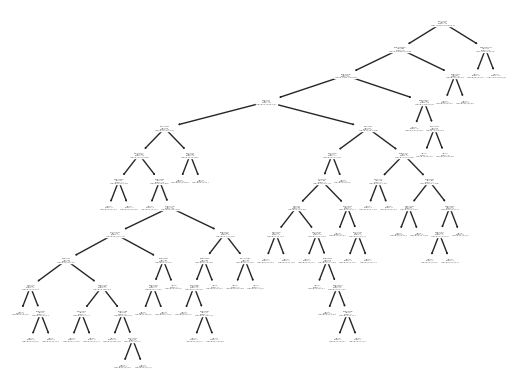

In [6]:
plt.figure()
plot_tree(classifier)
plt.show()

Evaluate model.

Accuracy: 0.86


<Figure size 640x480 with 0 Axes>

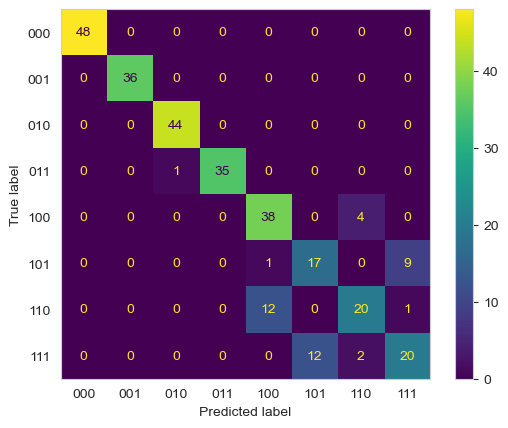

In [7]:
eval_model(X_test, y_test, classifier)

We can change the maximum depth of the classification tree.

In [8]:
classifier = DecisionTreeClassifier(random_state=0, max_depth=10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

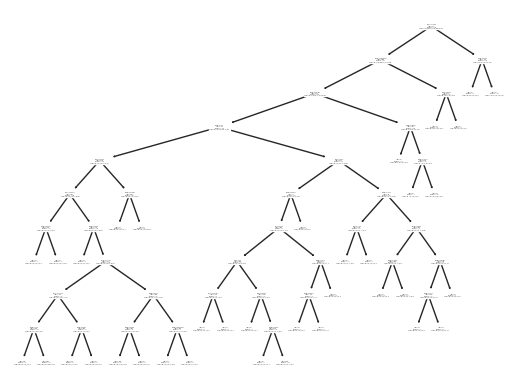

In [9]:
plt.figure()
plot_tree(classifier)
plt.show()

Evaluate model.

Accuracy: 0.85


<Figure size 640x480 with 0 Axes>

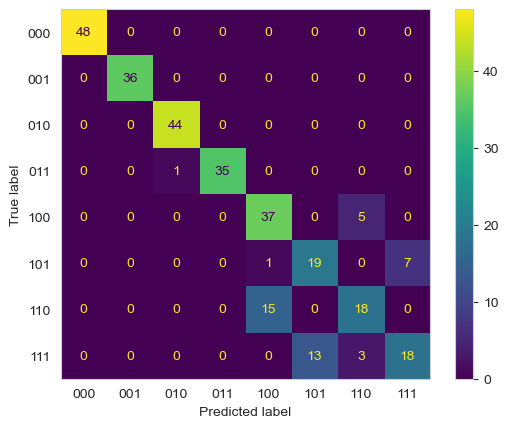

In [10]:
eval_model(X_test, y_test, classifier)